# Introduction to Pytorch

(This tutorial is modified from https://pytorch.org/tutorials/beginner/nlp/pytorch_tutorial.html)

PyTorch is a Python package that provides two high-level features:

* Tensor computation (like Numpy) with strong GPU acceleration
* Deep neural networks built on a tape-based autorgrad system

You can reuse your favorite Python packages such as NumPy, SciPy, and Cython to extend PyTorch when needed.

In [1]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
import numpy as np

torch.manual_seed(0)

## Creating Tensors

Tensors can be created from Python lists or Numpy array with the torch.tensor() function.

In [2]:
# One dimensional
data_list = [1., 2., 3.]
data_numpy = np.array(data_list)

print(torch.tensor(data_list))
print(torch.tensor(data_numpy))

# Two dimensional
data_list = [[1., 2., 3.], [4., 5., 6.]]
data_numpy = np.array(data_list)

print(torch.tensor(data_list))
print(torch.tensor(data_numpy))

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)


Check the size of the tensor with torch.Tensor.size(). In numpy, we check the size of the array by .shape.

In [3]:
data = torch.tensor(data_numpy)
print(data.size())

torch.Size([2, 3])


Creating tensors filled with $1$s and $0$s. 

In [4]:
oneTensor = torch.ones((5, 4))
zeroTensor = torch.zeros((5, 4))
print(oneTensor)
print(zeroTensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


## Random Number Generation

In [5]:
# Random integers
print(torch.randint(0, 10, (2, 5)))

# Random numbers drawn from a standard normal distribution
print(torch.randn((2, 5)))

# Random numbers drawn from a uniform distribution on the interval[0, 1)
print(torch.rand((2, 5)))

tensor([[4, 9, 3, 0, 3],
        [9, 7, 3, 7, 3]])
tensor([[ 0.1604, -0.6065, -0.7831,  1.0622, -0.2613],
        [ 1.0667,  0.4159,  0.8396, -0.8265, -0.7949]])
tensor([[0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423]])


## Operations with Tensors



For a full list of operations, you can refer to https://pytorch.org/docs/stable/torch.html

In [6]:
x = torch.Tensor([[1,2,3], [4,5,6]])
y = torch.Tensor([[10, 20, 30], [40, 50, 60]])

print(x + y)
print(x * y)
print(torch.exp(x))

tensor([[11., 22., 33.],
        [44., 55., 66.]])
tensor([[ 10.,  40.,  90.],
        [160., 250., 360.]])
tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5982, 148.4132, 403.4288]])


## Concatenation

In [7]:
x_1 = torch.randn(2, 5)
y_1 = torch.randn(2, 5)

# Concatenation along axis 0
z_1 = torch.cat((x_1, y_1))
print(z_1.size())

# Concatenation along axis 1
z_2 = torch.cat((x_1, y_1), axis=1)
print(z_2.size())

torch.Size([4, 5])
torch.Size([2, 10])


## Reshaping Tensors

In [8]:
x = torch.randn(2,3,4)
print(x)
print(x.view(2, 12))
print(x.view(2, -1))

tensor([[[-9.3348e-02,  6.8705e-01, -8.3832e-01,  8.9182e-04],
         [ 8.4189e-01, -4.0003e-01,  1.0395e+00,  3.5815e-01],
         [ 7.3246e-02,  1.1133e+00,  2.8227e-01,  4.3423e-01]],

        [[-8.0249e-01, -1.2952e+00, -7.5018e-01, -1.3120e+00],
         [ 2.0642e-01, -3.3345e-01, -4.2883e-01,  2.3292e-01],
         [ 7.9689e-01, -1.8484e-01, -3.7015e-01, -1.2103e+00]]])
tensor([[-9.3348e-02,  6.8705e-01, -8.3832e-01,  8.9182e-04,  8.4189e-01,
         -4.0003e-01,  1.0395e+00,  3.5815e-01,  7.3246e-02,  1.1133e+00,
          2.8227e-01,  4.3423e-01],
        [-8.0249e-01, -1.2952e+00, -7.5018e-01, -1.3120e+00,  2.0642e-01,
         -3.3345e-01, -4.2883e-01,  2.3292e-01,  7.9689e-01, -1.8484e-01,
         -3.7015e-01, -1.2103e+00]])
tensor([[-9.3348e-02,  6.8705e-01, -8.3832e-01,  8.9182e-04,  8.4189e-01,
         -4.0003e-01,  1.0395e+00,  3.5815e-01,  7.3246e-02,  1.1133e+00,
          2.8227e-01,  4.3423e-01],
        [-8.0249e-01, -1.2952e+00, -7.5018e-01, -1.3120e+00,  2.0

## Computation Graphs and Automatic Differentiation

The concept of a computation graph is essential to efficient deep learning programming, because it allows you to not have to write the back propagation gradients yourself. A computation graph is simply a specification of how your data is combined to give you the output. Since the graph totally specifies what parameters were involved with which operations, it contains enough information to compute derivatives. This probably sounds vague, so let’s see what is going on using the fundamental flag **requires_grad**.

First, think from a programmers perspective. What is stored in the torch.Tensor objects we were creating above? Obviously the data and the shape, and maybe a few other things. But when we added two tensors together, we got an output tensor. All this output tensor knows is its data and shape. It has no idea that it was the sum of two other tensors (it could have been read in from a file, it could be the result of some other operation, etc.)

If requires_grad=True, the Tensor object keeps track of how it was created. Lets see it in action.

In [9]:
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.tensor([4. ,5., 6.], requires_grad=True)

z = x*y
print(z)

s = z.sum()
s.backward()
print(x.grad)
print(y.grad)


tensor([ 4., 10., 18.], grad_fn=<MulBackward0>)
tensor([4., 5., 6.])
tensor([1., 2., 3.])


This grad_fn is an internal thing used by autograd which holds the reference to the function (mathematical operator) that creates it. But we are not supposed to use that.

In [10]:
x = torch.randn(2, 2)
y = torch.randn(2, 2)
print(x.requires_grad, y.requires_grad)

z = x + y
print(z.grad_fn)

False False
None


In [11]:
# You can set the requires_grad flag of a tensor to True by .requires_grad_()
x.requires_grad_()
y.requires_grad_()
z = x + y
print(z.grad_fn)
print(z.requires_grad)

new_z = z.detach()
print(new_z)
print(new_z.grad)

True
tensor([[-0.7433, -0.4694],
        [ 0.3229,  4.3425]])
None


## Example: Linear Regression with Pytorch

We first need to prepare the dataset.

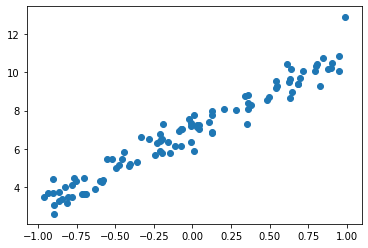

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# f(x) = 4x + 7
f = lambda x: 4 * x + 7

X = 2 * torch.rand((100, 1)) - 1
y = f(X) + 0.5 * torch.randn(100, 1)
y = y.view(-1, 1)

plt.scatter(X.numpy(), y.numpy());

In [13]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
inputSize = 1
outputSize = 1
learningRate = 0.1
epochs = 50

model = linearRegression(inputSize, outputSize)

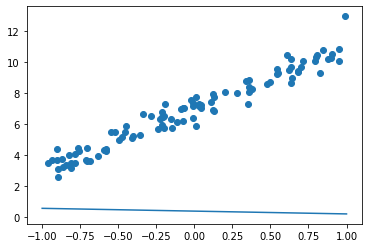

In [14]:
#Before Training

X_test = np.linspace(-1, 1, 1000)
y_test = model(torch.Tensor(X_test).view(-1, 1)).detach().numpy()

plt.scatter(X, y)
plt.plot(X_test, y_test)

In [15]:
# Train our linear regression model
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 47.45823669433594
epoch 1, loss 32.0056266784668
epoch 2, loss 21.929479598999023
epoch 3, loss 15.315171241760254
epoch 4, loss 10.935641288757324
epoch 5, loss 8.003740310668945
epoch 6, loss 6.013890266418457
epoch 7, loss 4.640801906585693
epoch 8, loss 3.674699306488037
epoch 9, loss 2.9798855781555176
epoch 10, loss 2.4682130813598633
epoch 11, loss 2.0821118354797363
epoch 12, loss 1.7837104797363281
epoch 13, loss 1.5478637218475342
epoch 14, loss 1.357681155204773
epoch 15, loss 1.2016507387161255
epoch 16, loss 1.0717884302139282
epoch 17, loss 0.9624460339546204
epoch 18, loss 0.869534432888031
epoch 19, loss 0.7900229692459106
epoch 20, loss 0.7216095924377441
epoch 21, loss 0.6625040173530579
epoch 22, loss 0.611283540725708
epoch 23, loss 0.566794753074646
epoch 24, loss 0.5280876755714417
epoch 25, loss 0.4943690896034241
epoch 26, loss 0.46496886014938354
epoch 27, loss 0.43931663036346436
epoch 28, loss 0.4169236123561859
epoch 29, loss 0.397368460893631


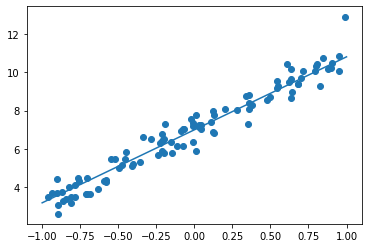

In [16]:
X_test = np.linspace(-1, 1, 1000)
y_test = model(torch.Tensor(X_test).view(-1, 1)).detach().numpy()

plt.scatter(X, y)
plt.plot(X_test, y_test)

## DataLoader

Note that we use gradient descent in the above example because our dataset is rediculously simple. However, for larget datasets, we often need to do mini-batch gradient descent. So we will use Pytorch's DataLoader class to do this job. We tell it which dataset to use , the desired mini-batch size and if we'd like to shuffle it or not. Our dataloader behaves like an iterator so that we can loop over it and fetch a different mini-batch every time. Let's repeat our training process with mini-batch gradient descent.

In order to use DataLoader in Pytorch, we need to first build a dataset which is represented by a regualr Python class the inherits from the **Dataset** class.

In [17]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
    
    def __getitem__(self, index):
        return (self.x[index], self.y[index])
    
    def __len__(self):
        return self.y.size()[0]

In [18]:
from torch.utils.data import DataLoader
model = linearRegression(inputSize, outputSize)
dataset = MyDataset(X, y)
train_loader = DataLoader(dataset, batch_size = 10, shuffle=True)

In [19]:
epochs = 10

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

for epoch in range(epochs):
    losses = []
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, np.mean(losses)))

epoch 0, loss 14.74139175415039
epoch 1, loss 1.2427824795246125
epoch 2, loss 0.4990119069814682
epoch 3, loss 0.3247808441519737
epoch 4, loss 0.28732679039239883
epoch 5, loss 0.27557157054543496
epoch 6, loss 0.2695241987705231
epoch 7, loss 0.26905782967805864
epoch 8, loss 0.26677989065647123
epoch 9, loss 0.26708001270890236


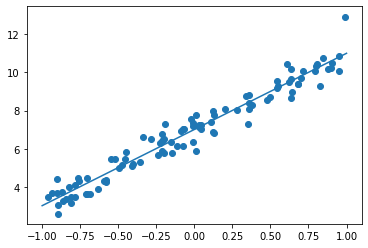

In [20]:
X_test = np.linspace(-1, 1, 1000)
y_test = model(torch.Tensor(X_test).view(-1, 1)).detach().numpy()

plt.scatter(X, y)
plt.plot(X_test, y_test)

## Exercise: Multi-Class Logistic (Softmax) Regression with Pytorch



Train a logistic regression model on iris dataset.

In [21]:
import pandas
import sklearn.datasets
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import random_split

iris = sklearn.datasets.load_iris()
X = iris.data   

lbls = LabelEncoder()
y = iris.target

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y)

dataset = MyDataset(X_tensor, y_tensor)
train_set, test_set = random_split(dataset, [int(len(dataset) * 0.8), int(len(dataset) * 0.2)])

In [22]:
print(len(train_set))
print(len(test_set))

120
30


In [23]:
X.shape[1]

4

### Solution

In [24]:
from sklearn.metrics import accuracy_score

inputDim = X.shape[1]
outputDim = 3

class logisticRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(logisticRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = logisticRegression(inputDim, outputDim)

dataloader = DataLoader(train_set, batch_size = 10, shuffle = True)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learningRate)

epochs = 100

for epoch in range(epochs):
    losses = []
    train_accuracy = []
    for x_batch, y_batch in dataloader:
        optimizer.zero_grad()
        
        output = model(x_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        losses.append(loss.item())
        train_accuracy.append(accuracy_score(y_batch, np.argmax(output.detach().numpy(), axis = 1)))
        
        optimizer.step()
    
    print('epoch {}, loss {}, train accuracy {}'.format(epoch, np.mean(losses), np.mean(train_accuracy)))

# inputSize = 1
# outputSize = 1
# learningRate = 0.1
# epochs = 50

# model = linearRegression(inputSize, outputSize)

epoch 0, loss 1.6181091169516246, train accuracy 0.36666666666666664
epoch 1, loss 1.3227699895699818, train accuracy 0.49999999999999994
epoch 2, loss 0.7545431305964788, train accuracy 0.6916666666666668
epoch 3, loss 0.7195869237184525, train accuracy 0.6666666666666666
epoch 4, loss 0.594997227191925, train accuracy 0.7000000000000001
epoch 5, loss 0.7037254472573599, train accuracy 0.7583333333333334
epoch 6, loss 0.7134008432428042, train accuracy 0.7166666666666667
epoch 7, loss 0.5295700008670489, train accuracy 0.7583333333333334
epoch 8, loss 0.5165602682779232, train accuracy 0.8083333333333335
epoch 9, loss 0.5222986588875452, train accuracy 0.7666666666666667
epoch 10, loss 0.37486159677306813, train accuracy 0.8250000000000001
epoch 11, loss 0.6267663016915321, train accuracy 0.75
epoch 12, loss 0.3424242436885834, train accuracy 0.8666666666666667
epoch 13, loss 0.8109173427025477, train accuracy 0.6666666666666666
epoch 14, loss 0.3681646486123403, train accuracy 0.8083

In [25]:
x_test, y_test = test_set[:]

with torch.no_grad():
    test_accuracy = accuracy_score(np.argmax(model(x_test).numpy(), axis=1), y_test)
    
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 1.0


### Salary Dataset

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("formated_data_1111.csv")
data.head()

,intern_num,max_sal,min_sal,city,month_num,day,2000,500-2000,50-500,<50,...,专员,产品,销售,开发,工程师,助理,运营,GDP(billion),GDP per capita,Population(thousand)
0,176,150,100,北京,3,3,1,0,0,0,...,0,0,0,0,0,0,0,3500.0,162518.5736,21536.0
1,390,150,120,北京,3,5,1,0,0,0,...,0,0,0,0,0,0,0,3500.0,162518.5736,21536.0
2,44,300,150,北京,5,4,1,0,0,0,...,0,0,0,1,1,0,0,3500.0,162518.5736,21536.0
3,486,200,150,北京,4,5,1,0,0,0,...,0,0,0,0,0,1,0,3500.0,162518.5736,21536.0
4,390,150,100,北京,3,5,1,0,0,0,...,0,0,0,0,0,0,1,3500.0,162518.5736,21536.0


In [28]:
# Min_Max scaler for GDP
data['GDP'] = (data['GDP per capita'] - 
               data['GDP per capita'].min())/(data['GDP per capita'].max() - data['GDP per capita'].min())

data_1 = data[['intern_num','max_sal','min_sal','GDP per capita','GDP','month_num','day','2000','500-2000','50-500','<50','互联网','教育','房产','广告','金融','企业服务','快消','电子','医疗','汽车']]
data_1['scale'] = data_1['2000']*5000 + data_1['500-2000']*1250 + data_1['50-500']*275 + data_1['<50']*25 
data_1

#确定 X和 y

X = data_1[['intern_num','GDP per capita','month_num','day','2000','500-2000','50-500','<50','互联网','教育','房产','广告','金融','企业服务','快消','电子','医疗','汽车']]
# X = data_1[['intern_num','GDP','month_num','day','2000','500-2000','50-500','<50']]
X = data_1[['intern_num','GDP per capita','month_num','day','scale']]
y = data_1['max_sal']

<ipython-input-28-dad69ffd2c16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['scale'] = data_1['2000']*5000 + data_1['500-2000']*1250 + data_1['50-500']*275 + data_1['<50']*25


(array([1004.,    0.,    0., 1545.,    0.,    0., 1434.,    0.,    0.,
         967.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

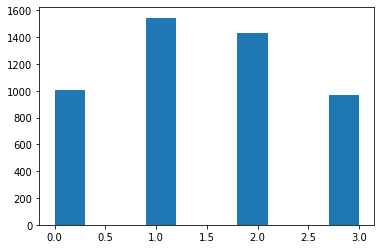

In [29]:
label = []
max_sal = data['max_sal'].to_numpy()
for i in max_sal:
    if i in range(0,150):
        label.append(0)
    elif i in range(150,175):
        label.append(1)
    elif i in range(175,250):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [30]:
X.shape[0]

4950

In [31]:
X.shape[1]

5

In [32]:
X

,intern_num,GDP per capita,month_num,day,scale
0,176,162518.5736,3,3,5000
1,390,162518.5736,3,5,5000
2,44,162518.5736,5,4,5000
3,486,162518.5736,4,5,5000
4,390,162518.5736,3,5,5000
...,...,...,...,...,...
4945,73,169782.5765,6,5,1250
4946,96,169782.5765,3,5,1250
4947,96,169782.5765,3,5,1250
4948,96,169782.5765,3,5,1250


In [33]:
X_tensor = torch.from_numpy(np.asarray(X)).float()
y_tensor = torch.from_numpy(y)

dataset = MyDataset(X_tensor, y_tensor)
train_set, test_set = random_split(dataset, [int(len(dataset) * 0.8), int(len(dataset) * 0.2)])

print(len(train_set))
print(len(test_set))

3960
990


In [34]:
y_tensor.unique()

tensor([0, 1, 2, 3])

In [37]:
from sklearn.metrics import accuracy_score

inputDim = X.shape[1]
outputDim = 4

class logisticRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(logisticRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = logisticRegression(inputDim, outputDim)

dataloader = DataLoader(train_set, batch_size = 20, shuffle = True)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learningRate)

epochs = 30

for epoch in range(epochs):
    losses = []
    train_accuracy = []
    for x_batch, y_batch in dataloader:
        optimizer.zero_grad()
        
        output = model(x_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        losses.append(loss.item())
        train_accuracy.append(accuracy_score(y_batch, np.argmax(output.detach().numpy(), axis = 1)))
        
        optimizer.step()
    
    print('epoch {}, loss {}, train accuracy {}'.format(epoch, np.mean(losses), np.mean(train_accuracy)))

epoch 0, loss 900156251.9516059, train accuracy 0.2547979797979798
epoch 1, loss 900664882.020202, train accuracy 0.2545454545454545
epoch 2, loss 883826758.4646465, train accuracy 0.2621212121212121
epoch 3, loss 882073469.0909091, train accuracy 0.25833333333333336
epoch 4, loss 872939992.080808, train accuracy 0.2656565656565657
epoch 5, loss 878955162.1010101, train accuracy 0.2565656565656565
epoch 6, loss 900177116.5252526, train accuracy 0.2484848484848485
epoch 7, loss 878320410.7474748, train accuracy 0.2588383838383838
epoch 8, loss 861287009.3737373, train accuracy 0.2686868686868687
epoch 9, loss 878564404.9090909, train accuracy 0.26237373737373737
epoch 10, loss 868788639.8383838, train accuracy 0.2631313131313131
epoch 11, loss 877652733.6161616, train accuracy 0.2588383838383838
epoch 12, loss 883936960.6464647, train accuracy 0.2563131313131313
epoch 13, loss 875496565.4949495, train accuracy 0.2593434343434344
epoch 14, loss 867031880.080808, train accuracy 0.26287878

In [38]:
x_test, y_test = test_set[:]

with torch.no_grad():
    test_accuracy = accuracy_score(np.argmax(model(x_test).numpy(), axis=1), y_test)
    
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.28484848484848485


(array([ 659.,    0.,    0., 1550.,    0.,    0.,  872.,    0.,    0.,
        1869.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

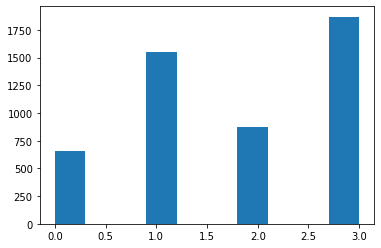

In [39]:
label = []
min_sal = data['min_sal'].to_numpy()
for i in min_sal:
    if i in range(0,100):
        label.append(0)
    elif i in range(100,120):
        label.append(1)
    elif i in range(120,150):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [40]:
X

,intern_num,GDP per capita,month_num,day,scale
0,176,162518.5736,3,3,5000
1,390,162518.5736,3,5,5000
2,44,162518.5736,5,4,5000
3,486,162518.5736,4,5,5000
4,390,162518.5736,3,5,5000
...,...,...,...,...,...
4945,73,169782.5765,6,5,1250
4946,96,169782.5765,3,5,1250
4947,96,169782.5765,3,5,1250
4948,96,169782.5765,3,5,1250


In [41]:
X_tensor = torch.from_numpy(np.asarray(X)).float()
y_tensor = torch.from_numpy(y)

dataset = MyDataset(X_tensor, y_tensor)
train_set, test_set = random_split(dataset, [int(len(dataset) * 0.8), int(len(dataset) * 0.2)])

print(len(train_set))
print(len(test_set))

from sklearn.metrics import accuracy_score

inputDim = X.shape[1]
outputDim = 4

class logisticRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(logisticRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = logisticRegression(inputDim, outputDim)

dataloader = DataLoader(train_set, batch_size = 20, shuffle = True)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learningRate)

epochs = 30

for epoch in range(epochs):
    losses = []
    train_accuracy = []
    for x_batch, y_batch in dataloader:
        optimizer.zero_grad()
        
        output = model(x_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        losses.append(loss.item())
        train_accuracy.append(accuracy_score(y_batch, np.argmax(output.detach().numpy(), axis = 1)))
        
        optimizer.step()
    
    print('epoch {}, loss {}, train accuracy {}'.format(epoch, np.mean(losses), np.mean(train_accuracy)))

3960
990
epoch 0, loss 823189336.4679017, train accuracy 0.2982323232323233
epoch 1, loss 838568637.7777778, train accuracy 0.2972222222222223
epoch 2, loss 836450352.5656565, train accuracy 0.2916666666666667
epoch 3, loss 853095175.919192, train accuracy 0.2871212121212121
epoch 4, loss 832520964.6060606, train accuracy 0.2967171717171717
epoch 5, loss 836543192.0, train accuracy 0.29292929292929293
epoch 6, loss 844101296.2424242, train accuracy 0.29065656565656567
epoch 7, loss 822778407.030303, train accuracy 0.3007575757575757
epoch 8, loss 843549699.2323233, train accuracy 0.2914141414141414
epoch 9, loss 877716584.2828283, train accuracy 0.27828282828282824
epoch 10, loss 836461985.2121212, train accuracy 0.29419191919191917
epoch 11, loss 839305255.919192, train accuracy 0.2936868686868687
epoch 12, loss 847486238.5454545, train accuracy 0.28560606060606064
epoch 13, loss 882868183.9595959, train accuracy 0.27348484848484844
epoch 14, loss 843996421.7777778, train accuracy 0.2

In [42]:
x_test, y_test = test_set[:]

with torch.no_grad():
    test_accuracy = accuracy_score(np.argmax(model(x_test).numpy(), axis=1), y_test)
    
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.38181818181818183
